In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Biblioteca para o uso do SQL:

In [60]:
from pandasql import sqldf

sqlite = lambda query: sqldf(query, globals());

In [61]:
import sqlite3
import sys

print(f"SQLite Version: {sqlite3.sqlite_version}")
print(f"Python Version: {sys.version}")

SQLite Version: 3.39.0
Python Version: 3.8.0 (default, Dec  9 2021, 17:53:27) 
[GCC 8.4.0]


#### Importando os datasets

In [62]:
Person_Person = pd.read_csv("data/Person_Person.csv", sep=';');
Production_Product = pd.read_csv("data/Production_Product.csv", sep=';');
Sales_Customer = pd.read_csv("data/Sales_Customer.csv", sep=';');
Sales_SalesOrderDetail = pd.read_csv("data/Sales_SalesOrderDetail.csv", sep=';');
Sales_SalesOrderHeader = pd.read_csv("data/Sales_SalesOrderHeader.csv", sep=';');
Sales_SpecialOfferProduct = pd.read_csv("data/Sales_SpecialOfferProduct.csv", sep=';');


## 1. Fazer a modelagem conceitual dos dados:

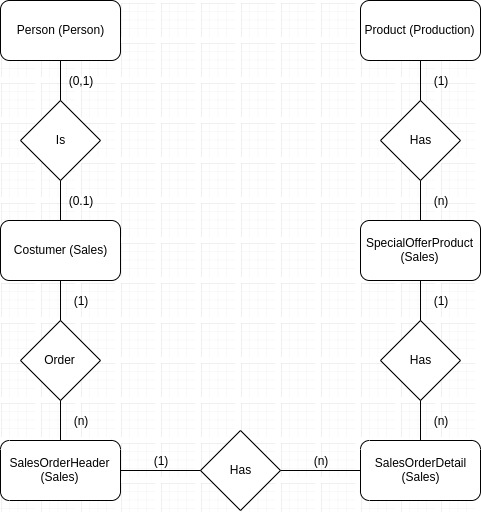

In [63]:
from IPython import display
display.Image("img/conceitual.jpg")

## 2. Realizar uma análise exploratória dos dados:

Análise exploratórias dos dados foi feita usando os métodos `.info()`, `.value_counts()` e `.describe()` com os quais foram obtidas informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [51]:
Person_Person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19972 entries, 0 to 19971
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BusinessEntityID       19972 non-null  int64 
 1   PersonType             19972 non-null  object
 2   NameStyle              19972 non-null  int64 
 3   Title                  1009 non-null   object
 4   FirstName              19972 non-null  object
 5   MiddleName             11473 non-null  object
 6   LastName               19972 non-null  object
 7   Suffix                 53 non-null     object
 8   EmailPromotion         19972 non-null  int64 
 9   AdditionalContactInfo  10 non-null     object
 10  Demographics           19972 non-null  object
 11  rowguid                19972 non-null  object
 12  ModifiedDate           19972 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.0+ MB


In [47]:
Production_Product.describe()

,ProductID,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,Weight,DaysToManufacture,ProductSubcategoryID,ProductModelID,DiscontinuedDate
count,504.000000,504.000000,504.000000,504.000000,504.000000,205.000000,504.000000,295.000000,295.000000,0.0
mean,673.039683,0.474206,0.585317,535.150794,401.363095,74.069220,1.103175,12.294915,37.444068,NaN
std,229.373142,0.499830,0.493157,374.112954,280.584715,182.166588,1.492616,9.860135,34.025442,NaN
min,1.000000,0.000000,0.000000,4.000000,3.000000,2.120000,0.000000,1.000000,1.000000,NaN
25%,447.750000,0.000000,0.000000,100.000000,75.000000,2.880000,0.000000,2.000000,11.000000,NaN
50%,747.500000,0.000000,1.000000,500.000000,375.000000,17.900000,1.000000,12.000000,26.000000,NaN
75%,873.250000,1.000000,1.000000,1000.000000,750.000000,27.350000,1.000000,17.000000,48.500000,NaN
max,999.000000,1.000000,1.000000,1000.000000,750.000000,1050.000000,4.000000,37.000000,128.000000,NaN


In [52]:
Sales_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     19820 non-null  int64  
 1   PersonID       19119 non-null  float64
 2   StoreID        1336 non-null   float64
 3   TerritoryID    19820 non-null  int64  
 4   AccountNumber  19820 non-null  object 
 5   rowguid        19820 non-null  object 
 6   ModifiedDate   19820 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [53]:
Sales_SalesOrderDetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SalesOrderID           121317 non-null  int64  
 1   SalesOrderDetailID     121317 non-null  int64  
 2   CarrierTrackingNumber  60919 non-null   object 
 3   OrderQty               121317 non-null  int64  
 4   ProductID              121317 non-null  int64  
 5   SpecialOfferID         121317 non-null  int64  
 6   UnitPrice              121317 non-null  object 
 7   UnitPriceDiscount      121317 non-null  object 
 8   LineTotal              121317 non-null  float64
 9   rowguid                121317 non-null  object 
 10  ModifiedDate           121317 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 10.2+ MB


In [30]:
Sales_SalesOrderHeader.describe()

,SalesOrderID,RevisionNumber,Status,OnlineOrderFlag,CustomerID,SalesPersonID,TerritoryID,BillToAddressID,ShipToAddressID,ShipMethodID,CreditCardID,CurrencyRateID,Comment
count,31465.000000,31465.000000,31465.0,31465.000000,31465.000000,3806.000000,31465.000000,31465.000000,31465.000000,31465.000000,30334.000000,13976.000000,0.0
mean,59391.000000,8.000953,5.0,0.879040,20170.175687,280.607987,6.090768,18263.154426,18249.192563,1.483839,9684.100448,9191.499571,NaN
std,9083.307446,0.030864,0.0,0.326086,6261.728960,4.846965,2.958119,8210.069158,8218.429263,1.304343,5566.299591,2945.170095,NaN
min,43659.000000,8.000000,5.0,0.000000,11000.000000,274.000000,1.000000,405.000000,9.000000,1.000000,1.000000,2.000000,NaN
25%,51525.000000,8.000000,5.0,1.000000,14432.000000,277.000000,4.000000,14080.000000,14063.000000,1.000000,4894.250000,8510.000000,NaN
50%,59391.000000,8.000000,5.0,1.000000,19452.000000,279.000000,6.000000,19449.000000,19438.000000,1.000000,9719.500000,10074.000000,NaN
75%,67257.000000,8.000000,5.0,1.000000,25994.000000,284.000000,9.000000,24678.000000,24672.000000,1.000000,14510.750000,11282.000000,NaN
max,75123.000000,9.000000,5.0,1.000000,30118.000000,290.000000,10.000000,29883.000000,29883.000000,5.000000,19237.000000,12431.000000,NaN


In [54]:
Sales_SpecialOfferProduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SpecialOfferID  538 non-null    int64 
 1   ProductID       538 non-null    int64 
 2   rowguid         538 non-null    object
 3   ModifiedDate    538 non-null    object
dtypes: int64(2), object(2)
memory usage: 16.9+ KB


## 3. Utilizar SQL para responder os questionamentos abaixo:

#### 1. Escreva uma query que retorna a quantidade de linhas na tabela Sales.SalesOrderDetail pelo campo SalesOrderID, desde que tenham pelo menos três linhas de detalhes.

In [70]:
query = '''
    SELECT SalesOrderID, COUNT(SalesOrderID)
    FROM Sales_SalesOrderDetail 
    GROUP BY SalesOrderID
    HAVING COUNT(SalesOrderID) > 2
'''
sqlite(query)

,SalesOrderID,COUNT(SalesOrderID)
0,43659,12
1,43661,15
2,43662,22
3,43664,8
4,43665,10
...,...,...
12752,75118,4
12753,75119,3
12754,75120,3
12755,75121,3


#### 2. Escreva uma query que ligue as tabelas Sales.SalesOrderDetail, Sales.SpecialOfferProduct e Production.Product e retorne os 3 produtos (Name) mais vendidos (pela soma de OrderQty), agrupados pelo número de dias para manufatura (DaysToManufacture).

In [71]:
query = '''
        SELECT Name, SumQty, DaystoManufacture
            FROM
            (SELECT pp.Name, SUM(ssod.OrderQty) as SumQty, pp.DaysToManufacture,
            ROW_NUMBER() OVER(PARTITION BY pp.DaysToManufacture ORDER BY SUM(ssod.OrderQty) DESC) as position
            FROM Sales_SpecialOfferProduct AS ssop
            JOIN Production_Product AS pp ON ssop.ProductID = pp.ProductID
            JOIN Sales_SalesOrderDetail AS ssod ON ssop.SpecialOfferID = ssod.SalesOrderDetailID
            GROUP BY pp.Name
            ORDER BY SumQty DESC)
        WHERE position <= 3
'''
sqlite(query)

,Name,SumQty,DaysToManufacture
0,"Sport-100 Helmet, Black",10,0
1,"Sport-100 Helmet, Blue",10,0
2,"Sport-100 Helmet, Red",10,0
3,"LL Road Frame - Black, 52",8,1
4,"LL Road Frame - Red, 44",8,1
5,"LL Road Frame - Red, 62",8,1
6,"Mountain-200 Black, 38",6,4
7,"Road-350-W Yellow, 48",6,4
8,"Road-650 Red, 44",6,4
9,"HL Mountain Frame - Silver, 38",4,2


#### 3. Escreva uma query ligando as tabelas Person.Person, Sales.Customer e Sales.SalesOrderHeader de forma a obter uma lista de nomes de clientes e uma contagem de pedidos efetuados.

In [6]:
query = '''
SELECT FirstName, MiddleName, LastName, COUNT(ssoh.CustomerID) as NumOrders
FROM Sales_SalesOrderHeader AS ssoh
JOIN Sales_Customer as sc ON ssoh.CustomerID = sc.CustomerID
JOIN Person_Person as pp ON sc.PersonID = pp.BusinessEntityID
GROUP BY ssoh.CustomerID
ORDER BY NumOrders desc
'''
sqlite(query)

,FirstName,MiddleName,LastName,NumOrders
0,Mason,D,Roberts,28
1,Dalton,None,Perez,28
2,Daniel,None,Davis,27
3,Samantha,None,Jenkins,27
4,Ryan,M,Thompson,27
...,...,...,...,...
19114,Ethan,G,Zhang,1
19115,Destiny,None,Wilson,1
19116,Jordan,C,King,1
19117,Wyatt,L,Hill,1


#### 4. Escreva uma query usando as tabelas Sales.SalesOrderHeader, Sales.SalesOrderDetail e Production.Product, de forma a obter a soma total de produtos (OrderQty) por ProductID e OrderDate.

In [11]:
query = '''
    SELECT ssod.ProductID, ssoh.OrderDate, SUM(OrderQty)
    FROM Sales_SalesOrderDetail AS ssod
    JOIN Sales_SalesOrderHeader as ssoh ON ssod.SalesOrderID  = ssoh.SalesOrderID 
    JOIN Production_Product AS pp ON ssod.ProductID = pp.ProductID 
    GROUP BY ssod.ProductID, ssoh.OrderDate
    ORDER BY ssod.ProductID, ssoh.OrderDate
'''
sqlite(query)

,ProductID,OrderDate,SUM(OrderQty)
0,707,2011-05-31 00:00:00.000,24
1,707,2011-07-01 00:00:00.000,58
2,707,2011-08-01 00:00:00.000,55
3,707,2011-08-31 00:00:00.000,41
4,707,2011-10-01 00:00:00.000,77
...,...,...,...
26873,999,2014-05-25 00:00:00.000,3
26874,999,2014-05-27 00:00:00.000,1
26875,999,2014-05-28 00:00:00.000,3
26876,999,2014-05-29 00:00:00.000,1


#### 5. Escreva uma query mostrando os campos SalesOrderID, OrderDate e TotalDue da tabela Sales.SalesOrderHeader. Obtenha apenas as linhas onde a ordem tenha sido feita durante o mês de setembro/2011 e o total devido esteja acima de 1.000. Ordene pelo total devido decrescente.

In [66]:
query = '''
    SELECT SalesOrderID, OrderDate, TotalDue
    FROM Sales_SalesOrderHeader
    WHERE OrderDate BETWEEN DATETIME("2011-09-01")||".000" AND DATETIME("2011-09-31")||".999"
    AND TotalDue > 1000
'''

sqlite(query)

,ProductID,OrderDate,sum(OrderQty)
0,707,2011-05-31 00:00:00.000,24
1,707,2011-07-01 00:00:00.000,58
2,707,2011-08-01 00:00:00.000,55
3,707,2011-08-31 00:00:00.000,41
4,707,2011-10-01 00:00:00.000,77
...,...,...,...
26873,999,2014-05-25 00:00:00.000,3
26874,999,2014-05-27 00:00:00.000,1
26875,999,2014-05-28 00:00:00.000,3
26876,999,2014-05-29 00:00:00.000,1


## 4. Criar um relatório em qualquer ferramenta de visualização de dados: